In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# [seeds](https://archive.ics.uci.edu/ml/datasets/seeds) Dataset: Dendrogram

In [23]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coef', 'l_groove', 'type']
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    delim_whitespace=True, names=cols)
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coef,l_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Hierarchical Clustering

In [24]:
seeds_ = seeds.copy()
seeds_.drop('type', axis=1, inplace=True)

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [26]:
# Calculate the linkage
mergings = linkage(seeds_.to_numpy(), method='complete')

In [27]:
# Plot the dendrogram, using varieties(type) as labels
varieties = seeds['type'].map({1: 'Kama',
                               2: 'Rosa',
                               3: 'Canadian'})

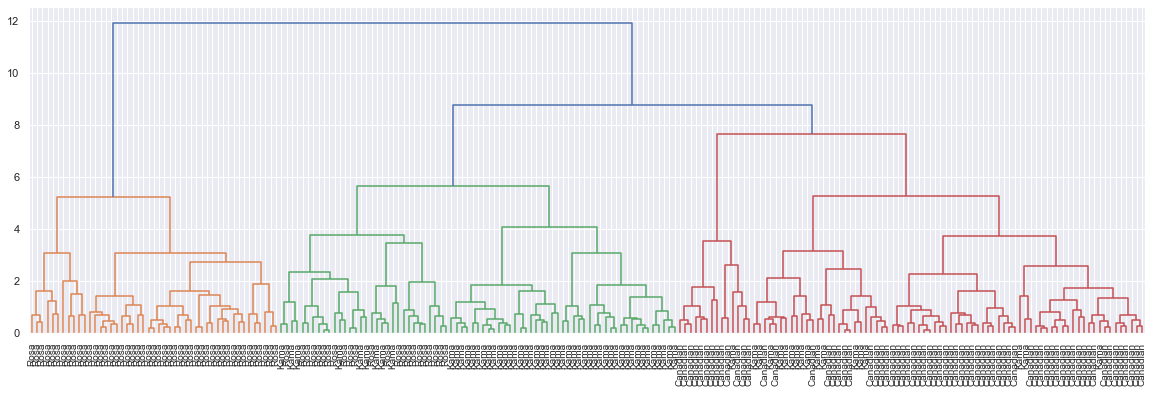

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))

dendrogram(mergings,
           labels=list(varieties.to_numpy()),
           leaf_rotation=90,
           leaf_font_size=10,
           ax=ax)

plt.show()

## Extracting cluster labels using `fcluster`

In [29]:
from scipy.cluster.hierarchy import fcluster

In [33]:
# use fcluster to extract labels
labels = fcluster(mergings, 8, criterion='distance')

In [34]:
# create DF with labels and varieties as columns
df = pd.DataFrame({'labels': labels,
                   'varieties': varieties})

In [35]:
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian,Kama,Rosa
labels,,,
1,0,0,47
2,0,52,23
3,70,18,0


## t-distributed Stochastic Neighbor Embedding (t-SNE)

In [47]:
from sklearn.manifold import TSNE

In [48]:
# create TSNE model
model1 = TSNE(learning_rate=200)

In [49]:
# apply fit_transform to samples
# (note: TSNE only has fit_transform method)
tsne_features = model1.fit_transform(seeds_)

In [50]:
# select features
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

# variety number of grains (type)
variety_numbers = seeds['type']

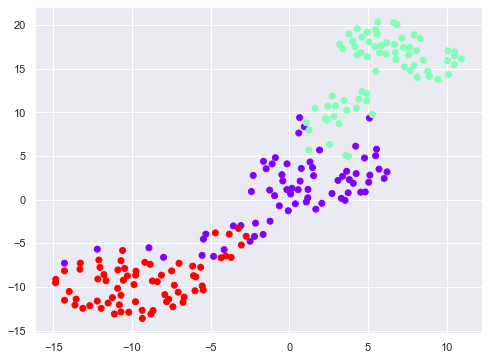

In [51]:
# create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(xs, ys, c=variety_numbers, cmap='rainbow')

plt.show()

# Stock Price Movements Dataset: Dendrogram

In [52]:
from sklearn.preprocessing import normalize

In [53]:
movements = np.loadtxt('movements.txt')

In [54]:
movements.shape

(60, 963)

## Hierarchical Clustering

In [55]:
# list of company names
companies = ['Apple',
             'AIG',
             'Amazon',
             'American express',
             'Boeing',
             'Bank of America',
             'British American Tobacco',
             'Canon',
             'Caterpillar',
             'Colgate-Palmolive',
             'ConocoPhillips',
             'Cisco',
             'Chevron',
             'DuPont de Nemours',
             'Dell',
             'Ford',
             'General Electrics',
             'Google/Alphabet',
             'Goldman Sachs',
             'GlaxoSmithKline',
             'Home Depot',
             'Honda',
             'HP',
             'IBM',
             'Intel',
             'Johnson & Johnson',
             'JPMorgan Chase',
             'Kimberly-Clark',
             'Coca Cola',
             'Lookheed Martin',
             'MasterCard',
             'McDonalds',
             '3M',
             'Microsoft',
             'Mitsubishi',
             'Navistar',
             'Northrop Grumman',
             'Novartis',
             'Pepsi',
             'Pfizer',
             'Procter Gamble',
             'Philip Morris',
             'Royal Dutch Shell',
             'SAP',
             'Schlumberger',
             'Sony',
             'Sanofi-Aventis',
             'Symantec',
             'Toyota',
             'Total',
             'Taiwan Semiconductor Manufacturing',
             'Texas instruments',
             'Unilever',
             'Valero Energy',
             'Walgreen',
             'Wells Fargo',
             'Wal-Mart',
             'Exxon',
             'Xerox',
             'Yahoo']

In [56]:
# normalize the movements
norm_movements = normalize(movements)

In [57]:
# Calculate linkage
mergings = linkage(norm_movements, method='complete')

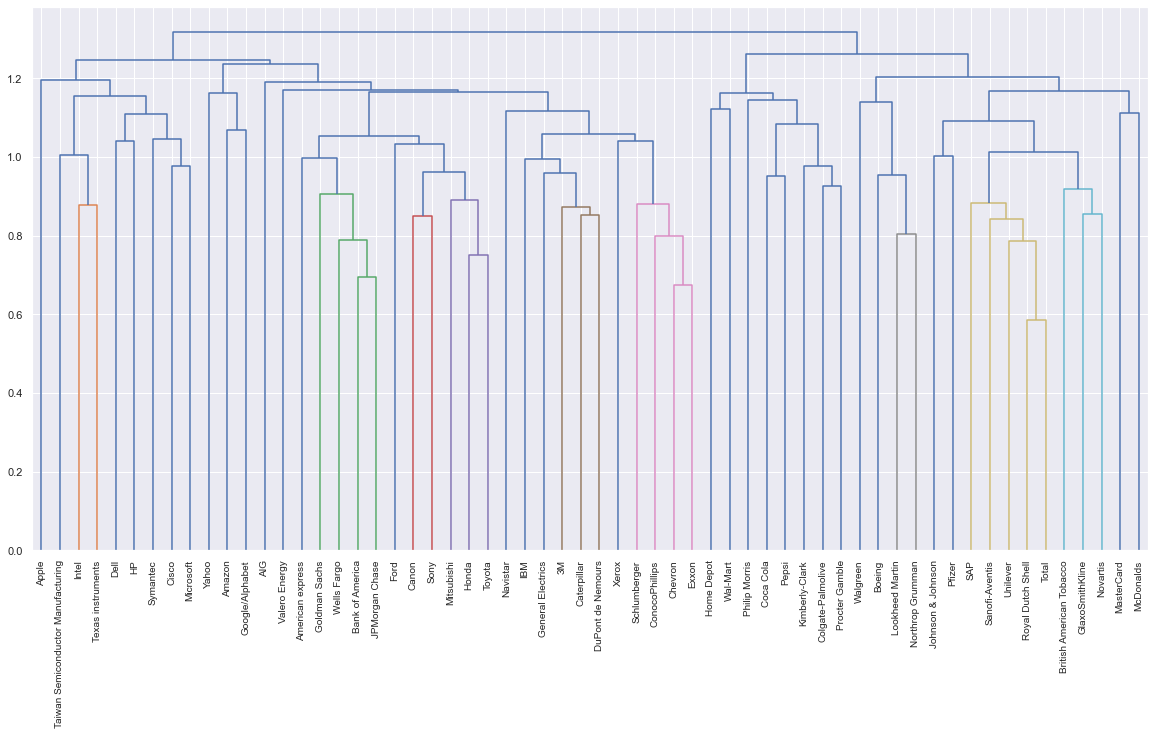

In [58]:
# Plot dendrogram
fig, ax = plt.subplots(figsize=(20, 10))

dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=10)

plt.show()

## t-SNE map of stock market

In [59]:
# create TSNE model
model2 = TSNE(learning_rate=50)

In [61]:
# apply fit_transform to normalized data
tsne_features = model2.fit_transform(norm_movements)

In [62]:
# select features
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

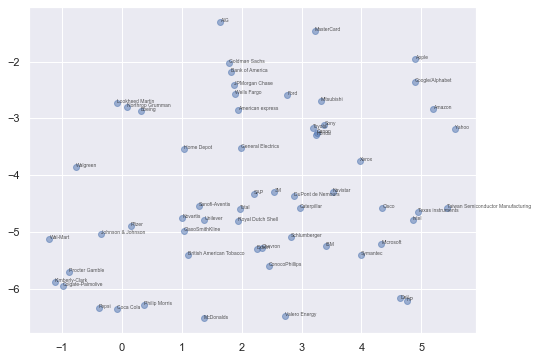

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(xs, ys, alpha=0.5)

# annotate points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)

plt.show()

# [Eurovision](https://eurovision.tv/history/full-split-results) Song Contest Dataset: Dendrogram

In [16]:
euro = np.loadtxt('euro.txt')

In [17]:
euro.shape

(42, 26)

In [18]:
country_names = ['Albania',
                 'Armenia',
                 'Australia',
                 'Austria',
                 'Azerbaijan',
                 'Belarus',
                 'Belgium',
                 'Bosnia & Herzegovina',
                 'Bulgaria',
                 'Croatia',
                 'Cyprus',
                 'Czech Republic',
                 'Denmark',
                 'Estonia',
                 'F.Y.R. Macedonia',
                 'Finland',
                 'France',
                 'Georgia',
                 'Germany',
                 'Greece',
                 'Hungary',
                 'Iceland',
                 'Ireland',
                 'Israel',
                 'Italy',
                 'Latvia',
                 'Lithuania',
                 'Malta',
                 'Moldova',
                 'Montenegro',
                 'Norway',
                 'Poland',
                 'Russia',
                 'San Marino',
                 'Serbia',
                 'Slovenia',
                 'Spain',
                 'Sweden',
                 'Switzerland',
                 'The Netherlands',
                 'Ukraine',
                 'United Kingdom']

## Hierarchical Clustering with `method='single'`

In [19]:
# Calculate linkage
mergings = linkage(euro, method='single')

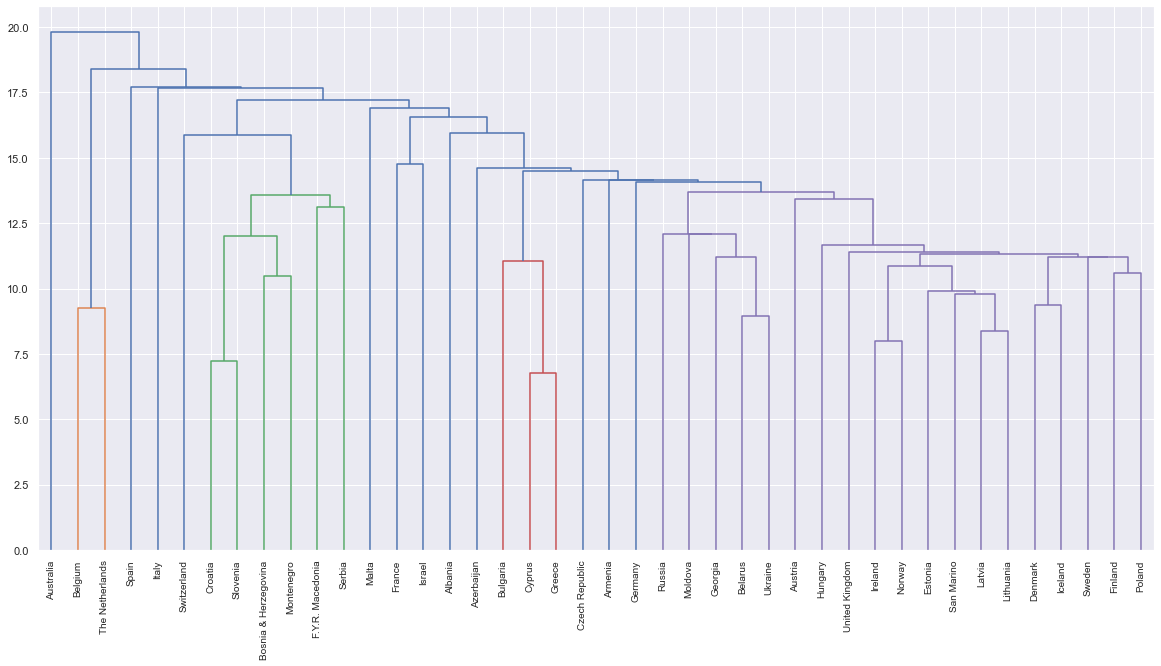

In [20]:
# Plot dendrogram
fig, ax = plt.subplots(figsize=(20, 10))

dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           ax=ax)

plt.show()

In [21]:
# to compare, we test with 'complete'
mergings = linkage(euro, method='complete')

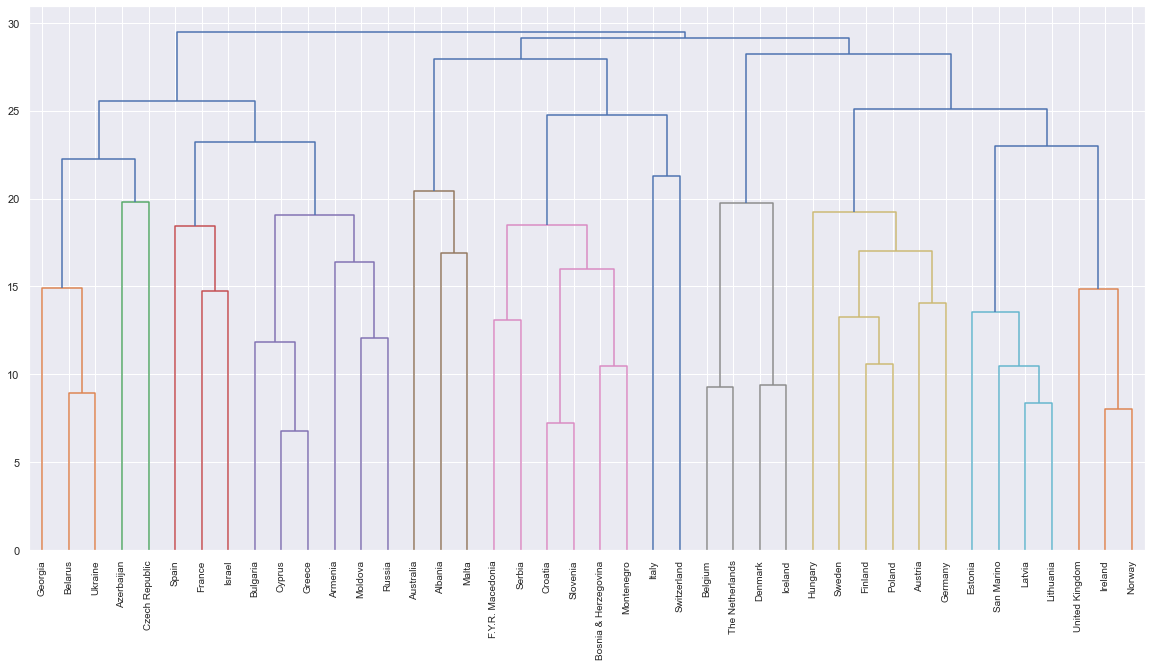

In [22]:
# Plot dendrogram
fig, ax = plt.subplots(figsize=(20, 10))

dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           ax=ax)

plt.show()